<a href="https://colab.research.google.com/github/DiegoPincheiraIb/Experiencias_EL5206/blob/master/Experiencia_2/Experiencia_2_EL5206_Desordenada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuraciones Preliminares

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, exposure
import os

## Cargar datos a colab:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ojos_impostor.rar to ojos_impostor.rar
Saving ojos_test.rar to ojos_test.rar
Saving ojos_gal.rar to ojos_gal.rar


In [3]:
!unrar x ojos_gal.rar
!unrar x ojos_impostor.rar
!unrar x ojos_test.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ojos_gal.rar

Creating    ojos_gal                                                  OK
Extracting  ojos_gal/I10_gal.jpg                                           9%  OK 
Extracting  ojos_gal/I1_gal.jpg                                           19%  OK 
Extracting  ojos_gal/I2_gal.jpg                                           31%  OK 
Extracting  ojos_gal/I3_gal.jpg                                           42%  OK 
Extracting  ojos_gal/I4_gal.jpg                                           50%  OK 
Extracting  ojos_gal/I5_gal.jpg                                           60%  OK 
Extracting  ojos_gal/I6_gal.jpg                                           71%  OK 
Extracting  ojos_gal/I7_gal.jpg                                           79%  OK 
Extracting  ojos_gal/I8_gal.jpg                                           90%  OK 


In [90]:
!ls

ojos_gal      ojos_impostor	 ojos_test	sample_data
ojos_gal.rar  ojos_impostor.rar  ojos_test.rar


In [94]:
Str_Gal = 'ojos_gal/'
Str_Impostor = 'ojos_impostor/ojos_impostor/'
Str_Test = 'ojos_test/'
Listado_Gal = os.listdir(Str_Gal)
Listado_Gal.sort()
Listado_Impostor = os.listdir(Str_Impostor)
Listado_Impostor.sort()
Listado_Test = os.listdir(Str_Test)
Listado_Test.sort()

## Función para convertir a escala de grises:

In [115]:
Listado_Gal_Gris = []
for imagen in Listado_Gal:
  print(Str_Gal + imagen)
  Listado_Gal_Gris.append(exposure.equalize_hist(color.rgb2gray(io.imread(Str_Gal + imagen))))

Listado_Impostor_Gris = []
for imagen in Listado_Impostor:
  Listado_Impostor_Gris.append(exposure.equalize_hist(color.rgb2gray(io.imread(Str_Impostor + imagen))))

Listado_Test_Gris = []
for imagen in Listado_Test:
  print(Str_Test + imagen)
  Listado_Test_Gris.append(exposure.equalize_hist(color.rgb2gray(io.imread(Str_Test + imagen))))

ojos_gal/I10_gal.jpg
ojos_gal/I1_gal.jpg
ojos_gal/I2_gal.jpg
ojos_gal/I3_gal.jpg
ojos_gal/I4_gal.jpg
ojos_gal/I5_gal.jpg
ojos_gal/I6_gal.jpg
ojos_gal/I7_gal.jpg
ojos_gal/I8_gal.jpg
ojos_gal/I9_gal.jpg
ojos_test/I10_test.jpg
ojos_test/I1_test.jpg
ojos_test/I2_test.jpg
ojos_test/I3_test.jpg
ojos_test/I4_test.jpg
ojos_test/I5_test.jpg
ojos_test/I6_test.jpg
ojos_test/I7_test.jpg
ojos_test/I8_test.jpg
ojos_test/I9_test.jpg


# Algoritmo LBP

In [7]:
# multiply
def LBP_v2(ImagenGris_Matriz):
  Matriz_Final_Copia = np.copy(ImagenGris_Matriz)
  Mascara_Valores = np.array([[128., 64., 32.],
                  [1., 0., 1.],
                  [2., 4., 8.]])
  for row in range(1,len(ImagenGris_Matriz)-1):
    for column in range(1,len(ImagenGris_Matriz[0])-1):
      mask = np.zeros((3,3))
      mask[1,1] = ImagenGris_Matriz[row,column]
      for fila in range(-1,2):
        for columna in range(-1,2):
          if fila != 0 and columna !=0:                      
            if ImagenGris_Matriz[row+fila,column+columna] > mask[1,1]:
              mask[fila, columna] = 1
      Numero_Entero = np.sum(np.multiply(mask,Mascara_Valores))
      Matriz_Final_Copia[row, column] = Numero_Entero

  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, -1, 0) # Elimina la última fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, -1, 1) # Elimina la última columna
  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, 0, 0) # Elimina la primera fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, 0, 1) # Elimina la primera columna
  return Matriz_Final_Copia

In [8]:
def LBP(ImagenGris_Matriz):
  Matriz_Final_Copia = np.copy(ImagenGris_Matriz)
  Mascara_Valores = np.array([[128., 64., 32.],
                  [1., 0., 1.],
                  [2., 4., 8.]])
  for row in range(1,len(ImagenGris_Matriz)-1):
    for column in range(1,len(ImagenGris_Matriz[0])-1):
      mask = np.zeros((3,3))
      mask[1,1] = ImagenGris_Matriz[row,column]
      for fila in range(-1,2):
        for columna in range(-1,2):
          if fila != 0 and columna !=0:                      
            if ImagenGris_Matriz[row+fila,column+columna] > mask[1,1]:
              mask[fila, columna] = 1
      Numero_Entero = np.sum(mask * Mascara_Valores)
      Matriz_Final_Copia[row, column] = Numero_Entero

  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, -1, 0) # Elimina la última fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, -1, 1) # Elimina la última columna
  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, 0, 0) # Elimina la primera fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, 0, 1) # Elimina la primera columna
  return Matriz_Final_Copia
  
def Imagen_Plot(Matriz_Obj):
  plt.imshow(Matriz_Obj, cmap='gray')
  plt.show()

# Extracción de vectores de características:

## Estirador_Imagen():
Dado una imagen objetivo, un paso y un ancho de ventana, "estira" una imagen.

In [9]:
def Estirador_Imagen(Imagen_Obj, Stride_Obj, Width_Obj):
  Matriz_Final = np.zeros((Stride_Obj,0))
  for row in range(0,len(Imagen_Obj),Stride_Obj): # Índices: 0, 100, 200, 300, 400
    for column in range(0, len(Imagen_Obj[0]),Stride_Obj): # Índices: 0, 100, 200, 300, 400, 500
      Mask = Imagen_Obj[row:row + Width_Obj,column:column + Width_Obj]
      Matriz_Final = np.concatenate((Matriz_Final,Mask),axis = 1)
  return Matriz_Final

## Calculador_Vector_Caract():
Dado una matriz y un paso, calcula histogramas tomando toda la imagen hacia abajo y moviendose en pasos regulares hacia la derecha, guardando los resultados de cada iteración en un arreglo.

In [37]:
def Calculador_Vector_Caract(Matriz_Obj,Stride_Obj):
  Vector_Caract_Obj = np.zeros((0,))
  for i in range(0,len(Matriz_Obj[0]),Stride_Obj):
    (Histogramas_Prueba, Bins_Prueba) = np.histogram(Estirador_Prueba[0:100,i:i + Stride_Obj], bins=59)
    Vector_Caract_Obj = np.concatenate((Vector_Caract_Obj,Histogramas_Prueba))
  return Vector_Caract_Obj

In [ ]:
def Extraer_Caract(Imagen, Normalizar=False):
  Hist_Arr = np.zeros((0,))
  for row in range(0, Imagen.shape[0], 100): 
    for col in range(0, Imagen.shape[1], 100):
      hist, bin_edges = np.histogram(Imagen[row:row+100, col:col+100], bins=59, density=Normalizar)
      Hist_Arr = np.concatenate((Hist_Arr, hist))
  return Hist_Arr

Prueba:

In [30]:
print(len(Estirador_Prueba[0]))

3000


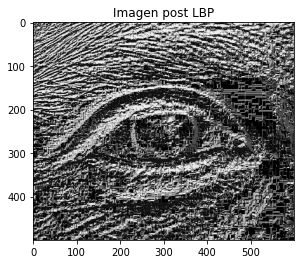

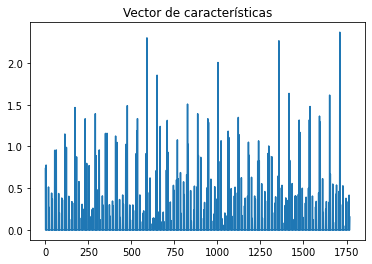

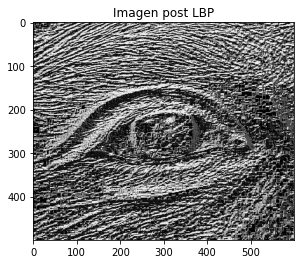

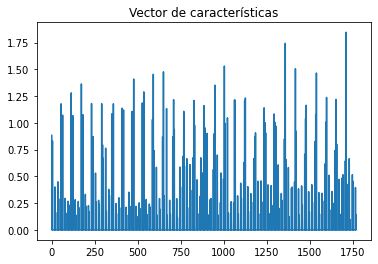

In [116]:
'''
Prueba = Listado_Gal_Gris[6]
Matriz_LBP = LBP(Prueba)
plt.title('Imagen post LBP')
Imagen_Plot(Matriz_LBP)
Stride = 100
Width = 100
Estirador_Prueba = Estirador_Imagen(Matriz_LBP, Stride, Width)
plt.title('Imagen estirada')
Imagen_Plot(Estirador_Prueba)
Vector_Caract_Prueba = Calculador_Vector_Caract(Estirador_Prueba, Stride)
plt.plot(Vector_Caract_Prueba)
plt.title('Vector de características')
plt.show()
'''
# --------------------------------------
Prueba = Listado_Test_Gris[6]
Matriz_LBP = LBP(Prueba)
plt.title('Imagen post LBP')
Imagen_Plot(Matriz_LBP)
hist_arr = Extraer_Caract(Matriz_LBP, True)
plt.plot(hist_arr)
plt.title('Vector de características')
plt.show()
# --------------------------------------
Prueba = Listado_Gal_Gris[6]
Matriz_LBP = LBP(Prueba)
plt.title('Imagen post LBP')
Imagen_Plot(Matriz_LBP)
hist_arr = Extraer_Caract(Matriz_LBP, True)
plt.plot(hist_arr)
plt.title('Vector de características')
plt.show()

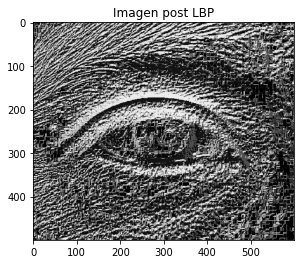

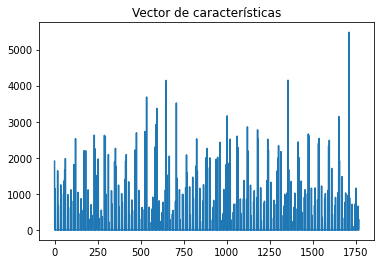

In [77]:
#Prueba = Listado_Gal_Gris[6]
#Matriz_LBP = LBP(Prueba)
Matriz_LBP = Test_LBP[6]
plt.title('Imagen post LBP')
Imagen_Plot(Matriz_LBP)
hist_arr = Extraer_Caract(Matriz_LBP)
plt.plot(hist_arr)
plt.title('Vector de características')
plt.show()

# Distancia

# Base de datos:

In [108]:
Gal_LBP = []
Impostor_LBP = []
Test_LBP = []

for imagen in Listado_Gal_Gris:
  Gal_LBP.append(LBP(imagen))

for imagen in Listado_Impostor_Gris:
  Impostor_LBP.append(LBP(imagen))

for imagen in Listado_Test_Gris:
  Test_LBP.append(LBP(imagen))

In [20]:
Gal_LBP_2 = []
Impostor_LBP_2 = []
Test_LBP_2 = []

for imagen in Listado_Gal_Gris:
  Gal_LBP_2.append(LBP_v2(imagen))

for imagen in Listado_Impostor_Gris:
  Impostor_LBP_2.append(LBP_v2(imagen))

for imagen in Listado_Test_Gris:
  Test_LBP_2.append(LBP_v2(imagen))

In [87]:
def distancia(vec1, vec2):
  assert len(vec1) == len(vec2)
  n = len(vec1)
  dist = 0
  for i in range(0, n):
    dist = dist + abs(vec1[i] - vec2[i])
  return dist

In [119]:
print(distancia(DB_Gal[6],DB_Test[6]))

26.028984615384605


# P4

## Base de datos:


In [117]:
DB_Gal = []
for matriz in Gal_LBP:
  Gal_caract = Extraer_Caract(matriz, True)
  DB_Gal.append(Gal_caract)

DB_Test = []
for matriz in Test_LBP:
  Test_caract = Extraer_Caract(matriz, True)
  DB_Test.append(Test_caract)


In [164]:
def reconocimiento(DB, lista, umbral):
  contador = 0
  contador_3 = 0
  for caract in DB:
    print('Se compara sujeto: ', contador_3 + 1)
    contador_2 = 0
    for matriz in lista:      
      test_caract = Extraer_Caract(matriz, True)
      #print(distancia(caract, test_caract))
      if distancia(caract, test_caract) <= umbral:
        print(distancia(caract, test_caract))
        print(contador_2 + 1)
        contador += 1
      contador_2 += 1
    print('siguiente')
    contador_3 += 1
  return contador

In [168]:
contador = reconocimiento(DB_Gal, Test_LBP, 26.9)
print(contador)

Se compara sujeto:  1
11.18367692307692
1
siguiente
Se compara sujeto:  2
22.81666153846153
2
siguiente
Se compara sujeto:  3
8.156523076923078
3
siguiente
Se compara sujeto:  4
14.296153846153835
4
siguiente
Se compara sujeto:  5
22.197615384615364
5
siguiente
Se compara sujeto:  6
23.944015384615366
6
siguiente
Se compara sujeto:  7
26.010830769230747
3
26.028984615384605
7
26.676169230769233
9
siguiente
Se compara sujeto:  8
24.678338461538463
8
siguiente
Se compara sujeto:  9
25.347307692307687
9
siguiente
Se compara sujeto:  10
19.69056923076921
10
siguiente
12
